<a href="https://colab.research.google.com/github/citybayern/gigehakshp/blob/main/0410_%EA%B8%B0%EA%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [34]:
g = tf.random.Generator.from_seed(2020)
x = g.normal(shape=(10,))
y = 3*x -2
     

In [35]:
def cal_mse(x, y, a, b):
    y_pred = a*x +b
    squared_error = (y_pred - y) ** 2
    mean_squared_error = tf.reduce_mean(squared_error)

    return mean_squared_error

In [36]:
a = tf.Variable(0.0)
b = tf.Variable(0.0)

EPOCHS = 500

for epoch in range(1, EPOCHS+1):
    with tf.GradientTape() as tape:
        mse = cal_mse(x, y, a, b)
    if mse < 0.000001:
        break
    
    grade = tape.gradient(mse, {'a':a, 'b':b})
    d_a, d_b = grade['a'], grade['b']
    a.assign_sub(d_a * 0.05)## a = a - d_a*0.05(학습률)
    b.assign_sub(d_b * 0.05)## b = b - d_b*0.05(학습률)

    if epoch % 20 == 0:
        print("EPOCH %d - MSE : %.4f - a: %.2f - b : %.2f"%(epoch, mse, a, b))

EPOCH 20 - MSE : 1.1415 - a: 1.74 - b : -0.75
EPOCH 40 - MSE : 0.2881 - a: 2.37 - b : -1.37
EPOCH 60 - MSE : 0.0728 - a: 2.69 - b : -1.68
EPOCH 80 - MSE : 0.0184 - a: 2.84 - b : -1.84
EPOCH 100 - MSE : 0.0046 - a: 2.92 - b : -1.92
EPOCH 120 - MSE : 0.0012 - a: 2.96 - b : -1.96
EPOCH 140 - MSE : 0.0003 - a: 2.98 - b : -1.98
EPOCH 160 - MSE : 0.0001 - a: 2.99 - b : -1.99
EPOCH 180 - MSE : 0.0000 - a: 2.99 - b : -1.99
EPOCH 200 - MSE : 0.0000 - a: 3.00 - b : -2.00
EPOCH 220 - MSE : 0.0000 - a: 3.00 - b : -2.00


In [37]:
#1회 d_a, d_b값 구하기
d_a_1 = -np.sum(x*y)/10*2
d_b_1 = -np.sum(y)/10*2
print("1 : d_a:{} d_b: {}".format(d_a_1, d_b_1))
     

1 : d_a:-3.423411560058594 d_b: -0.023897886276245117


In [38]:
#데이터셋 생성(노이즈 첨가)
g = tf.random.Generator.from_seed(2020)
x1 = g.normal(shape = (10,))
noise_1 = np.random.normal(0.1, size = (10,))
y_1 = 3*x - 2 + noise_1

In [39]:
a = tf.Variable(0.0)
b = tf.Variable(0.0)

EPOCHS = 500

for epoch in range(1, EPOCHS+1):
    with tf.GradientTape() as tape:
        mse = cal_mse(x, y_1, a, b)
    if mse < 0.000001:
        break
    
    grade = tape.gradient(mse, {'a':a, 'b':b})
    d_a, d_b = grade['a'], grade['b']
    a.assign_sub(d_a * 0.05)## a = a - d_a*0.05(학습률)
    b.assign_sub(d_b * 0.05)## b = b - d_b*0.05(학습률)

    if epoch % 20 == 0:
        print("EPOCH %d - MSE : %.4f - a: %.2f - b : %.2f"%(epoch, mse, a, b))

EPOCH 20 - MSE : 1.8723 - a: 1.62 - b : -0.87
EPOCH 40 - MSE : 1.0224 - a: 2.25 - b : -1.48
EPOCH 60 - MSE : 0.8078 - a: 2.56 - b : -1.80
EPOCH 80 - MSE : 0.7536 - a: 2.71 - b : -1.96
EPOCH 100 - MSE : 0.7399 - a: 2.79 - b : -2.04
EPOCH 120 - MSE : 0.7364 - a: 2.83 - b : -2.08
EPOCH 140 - MSE : 0.7355 - a: 2.85 - b : -2.10
EPOCH 160 - MSE : 0.7353 - a: 2.86 - b : -2.11
EPOCH 180 - MSE : 0.7353 - a: 2.87 - b : -2.11
EPOCH 200 - MSE : 0.7353 - a: 2.87 - b : -2.12
EPOCH 220 - MSE : 0.7353 - a: 2.87 - b : -2.12
EPOCH 240 - MSE : 0.7353 - a: 2.87 - b : -2.12
EPOCH 260 - MSE : 0.7353 - a: 2.87 - b : -2.12
EPOCH 280 - MSE : 0.7353 - a: 2.87 - b : -2.12
EPOCH 300 - MSE : 0.7353 - a: 2.87 - b : -2.12
EPOCH 320 - MSE : 0.7353 - a: 2.87 - b : -2.12
EPOCH 340 - MSE : 0.7353 - a: 2.87 - b : -2.12
EPOCH 360 - MSE : 0.7353 - a: 2.87 - b : -2.12
EPOCH 380 - MSE : 0.7353 - a: 2.87 - b : -2.12
EPOCH 400 - MSE : 0.7353 - a: 2.87 - b : -2.12
EPOCH 420 - MSE : 0.7353 - a: 2.87 - b : -2.12
EPOCH 440 - MSE :

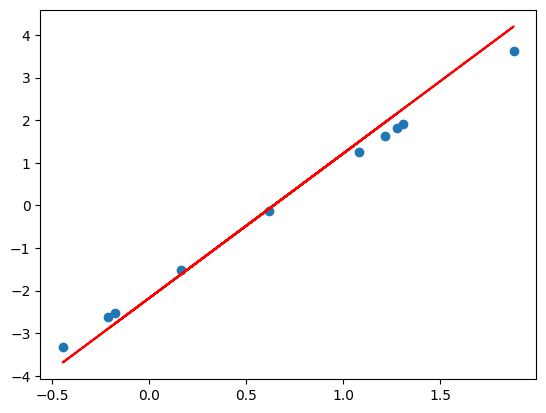

In [40]:
y_pred = 3.4*x -2.18
plt.scatter(x1,y)
plt.plot(x1, y_pred, color = 'r')
plt.show()
     

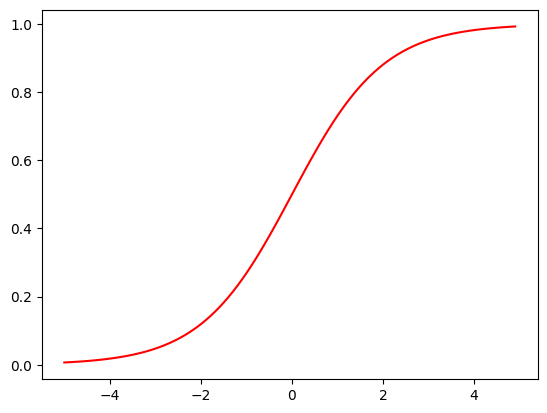

In [19]:
xx = tf.range(-5,5,0.1)
yy = tf.nn.sigmoid(xx)
plt.plot(xx,yy, 'r-')
plt.show()
     

In [20]:
with tf.GradientTape() as tape:
    tape.watch(xx)
    yy = tf.sigmoid(xx)
dy = tape.gradient(yy,xx)

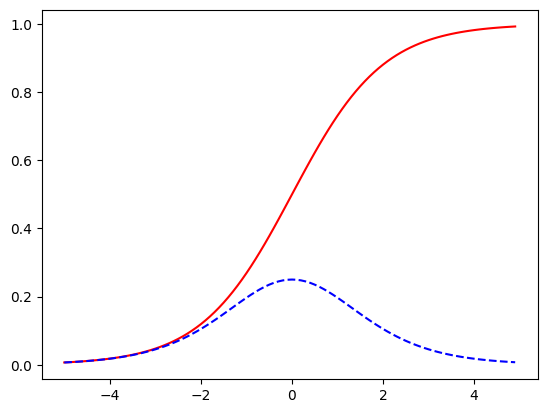

In [21]:
plt.plot(xx,yy, "r-")
plt.plot(xx,dy, "b--")
plt.show()
     

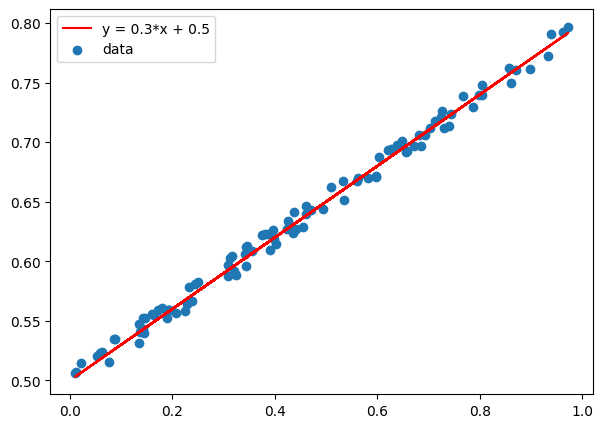

w: 0.3, b: 0.5


In [22]:
#경사하강법
def make_linear(w=0.5, b=0.8, size=50, noise= 1.0):
    x = np.random.rand(size)
    y = w*x + b
    noise = np.random.uniform(-abs(noise), abs(noise), size = y.shape)
    yy = y + noise
    plt.figure(figsize=(7, 5))
    plt.plot(x, y, color='r', label=f'y = {w}*x + {b}')
    plt.scatter(x, yy, label='data')
    plt.legend(fontsize=10)
    plt.show()
    print(f'w: {w}, b: {b}')
    return x, yy

x,y = make_linear(w=0.3, b=0.5, size=100, noise=0.01) 

In [41]:
#단순 선형 회귀 모델 만들기 
#1.데이터 생성 
#2. 단순 선형 회귀 모형만들기 
#3.컴파일 
#4.훈련 
#5.검증 
#6.예측

In [42]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape = [1])
])


In [43]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [44]:
##옵티마이저: 경사하강법, 손실함수 : 평균제곱오차함수, 평가치표: 평균절대오차
model1.compile(optimizer='sgd', loss = 'mse', metrics = ['mae'])

In [46]:
##훈련 :데이터셋 사용, 애포크 지정
history1 = model1.fit(x,y,epochs = 1200)

Epoch 1/1200
1/1 [==============================] - 1s 852ms/step - loss: 4.6506 - mae: 1.9438
Epoch 2/1200
1/1 [==============================] - 0s 15ms/step - loss: 4.5528 - mae: 1.9224
Epoch 3/1200
1/1 [==============================] - 0s 23ms/step - loss: 4.4587 - mae: 1.9015
Epoch 4/1200
1/1 [==============================] - 0s 27ms/step - loss: 4.3680 - mae: 1.8810
Epoch 5/1200
1/1 [==============================] - 0s 21ms/step - loss: 4.2805 - mae: 1.8609
Epoch 6/1200
1/1 [==============================] - 0s 23ms/step - loss: 4.1961 - mae: 1.8412
Epoch 7/1200
1/1 [==============================] - 0s 18ms/step - loss: 4.1146 - mae: 1.8219
Epoch 8/1200
1/1 [==============================] - 0s 18ms/step - loss: 4.0358 - mae: 1.8029
Epoch 9/1200
1/1 [==============================] - 0s 18ms/step - loss: 3.9597 - mae: 1.7842
Epoch 10/1200
1/1 [==============================] - 0s 15ms/step - loss: 3.8860 - mae: 1.7659
Epoch 11/1200
1/1 [==============================] - 0s 19

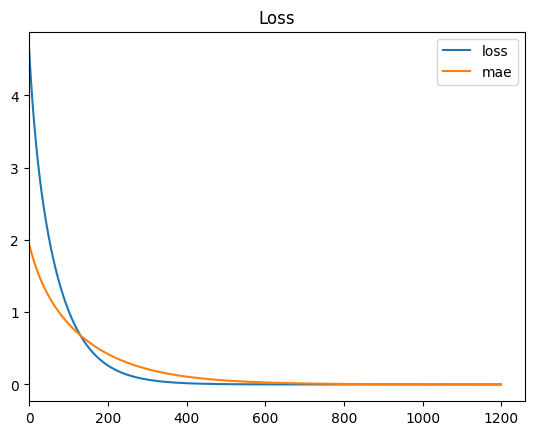

In [47]:
plt.plot(history1.history['loss'], label='loss')
plt.plot(history1.history['mae'], label='mae')
plt.xlim(-1.20)
plt.title('Loss')
plt.legend()
plt.show()

In [49]:
model1.evaluate(x,y)

1/1 [==============================] - 0s 141ms/step - loss: 3.3753e-07 - mae: 4.7712e-04


[3.375301389496599e-07, 0.0004771232488565147]

In [51]:
model1.predict([10])

1/1 [==============================] - 0s 75ms/step


array([[27.993692]], dtype=float32)

In [52]:
g = tf.random.Generator.from_seed(2020)
x = g.normal(shape = (10,))
noise_1 = np.random.normal(0.1, size = (10,))
y = 3*x - 2 + noise_1
     

In [53]:
a = tf.Variable(0.0)
b = tf.Variable(0.0)

EPOCHS = 500
prev_mse = 0.0

for epoch in range(1, EPOCHS+1):
    with tf.GradientTape() as tape:
        mse = cal_mse(x, y, a, b)
    if abs(mse - prev_mse) < 0.000001:
        break
    prev_mse = mse
    
    grade = tape.gradient(mse, {'a':a, 'b':b})
    d_a, d_b = grade['a'], grade['b']
    a.assign_sub(d_a * 0.05)## a = a - d_a*0.05(학습률)
    b.assign_sub(d_b * 0.05)## b = b - d_b*0.05(학습률)

    if epoch % 10 == 0:
        print("EPOCH %d - MSE : %.4f - a: %.2f - b : %.2f"%(epoch, mse, a, b))
     


EPOCH 10 - MSE : 2.1947 - a: 0.90 - b : -0.24
EPOCH 20 - MSE : 1.4845 - a: 1.36 - b : -0.59
EPOCH 30 - MSE : 1.1366 - a: 1.65 - b : -0.87
EPOCH 40 - MSE : 0.9619 - a: 1.85 - b : -1.07
EPOCH 50 - MSE : 0.8742 - a: 1.99 - b : -1.22
EPOCH 60 - MSE : 0.8301 - a: 2.10 - b : -1.32
EPOCH 70 - MSE : 0.8079 - a: 2.17 - b : -1.39
EPOCH 80 - MSE : 0.7968 - a: 2.22 - b : -1.45
EPOCH 90 - MSE : 0.7912 - a: 2.25 - b : -1.48
EPOCH 100 - MSE : 0.7883 - a: 2.28 - b : -1.51
EPOCH 110 - MSE : 0.7869 - a: 2.30 - b : -1.53
EPOCH 120 - MSE : 0.7862 - a: 2.31 - b : -1.54
EPOCH 130 - MSE : 0.7859 - a: 2.32 - b : -1.55
EPOCH 140 - MSE : 0.7857 - a: 2.33 - b : -1.55
EPOCH 150 - MSE : 0.7856 - a: 2.33 - b : -1.56
EPOCH 160 - MSE : 0.7855 - a: 2.33 - b : -1.56
EPOCH 170 - MSE : 0.7855 - a: 2.34 - b : -1.56


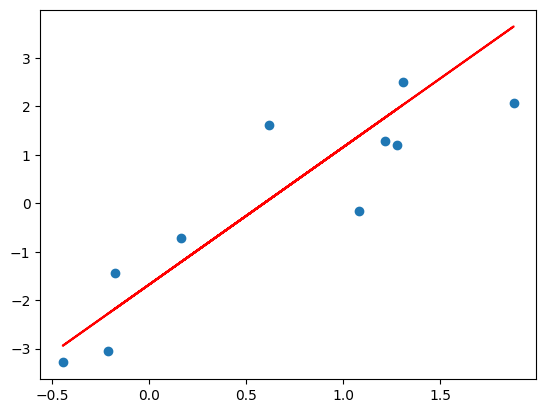

In [54]:
y_pred = 2.84*x -1.68
plt.scatter(x,y)
plt.plot(x, y_pred, color = 'r')
plt.show()